In [36]:
import pandas as pd
from pyecharts.charts import Map 
from pyecharts import options as opts
import matplotlib
import matplotlib.pyplot as plt

In [79]:
from matplotlib.font_manager import FontProperties

# 设置字体
font_path = 'SimHei.ttf'  # 替换为你的字体文件路径
font = FontProperties(fname=font_path, size=12)

In [44]:
df = pd.read_excel ("preprocessed_supermarket.xlsx")
row, col = df.shape
print(df.head())

    利润率         制造商   产品名称   利润       发货日期  地区  城市  子类别   折扣  数量 省/自治区    类别  \
0 -0.47     Fiskars     剪刀  -61 2016-04-29  华东  杭州   用品  0.4   2    浙江  办公用品   
1  0.34   GlobeWeis   搭扣信封   43 2016-06-19  西南  内江   信封  0.0   2    四川  办公用品   
2  0.13    Cardinal  孔加固材料    4 2016-06-19  西南  内江  装订机  0.4   2    四川  办公用品   
3 -0.08    Kleencut    开信刀  -27 2016-12-13  华东  镇江   用品  0.4   4    江苏  办公用品   
4  0.40  KitchenAid    搅拌机  550 2015-06-02  中南  汕头   器具  0.0   3    广东  办公用品   

    细分       订单日期 邮寄方式   销售额 订单国家     订单编号 产品描述  
0   公司 2016-04-27   二级   130   US  1357144   蓝色  
1  消费者 2016-06-15  标准级   125   CN  1973789   红色  
2  消费者 2016-06-15  标准级    32   CN  1973789   回收  
3   公司 2016-12-09  标准级   321   US  3017568   工业  
4  消费者 2015-05-31   二级  1376   CN  2975416   黑色  


## 总体概览

In [3]:
print("订单收货地址来自" + str(df[['地区']].drop_duplicates().shape[0]) + "个地区")
print("订单收货地址来自" + str(df[['省/自治区']].drop_duplicates().shape[0]) + "个省/自治区")
print("订单收货地址来自" + str(df[['城市']].drop_duplicates().shape[0]) + "个城市")

订单收货地址来自6个地区
订单收货地址来自31个省/自治区
订单收货地址来自581个城市


In [39]:
print(df[df['类别']=='办公用品'][['省/自治区']].drop_duplicates().shape[0])

31


## 以省/自治区为单位的数据分布

### 总销量分布

In [6]:
province_mapping = {
    '浙江': '浙江省',
    '四川': '四川省',
    '江苏': '江苏省',
    '广东': '广东省',
    '江西': '江西省',
    '陕西': '陕西省',
    '黑龙江': '黑龙江省',
    '山东': '山东省',
    '上海': '上海市',
    '河北': '河北省',
    '福建': '福建省',
    '安徽': '安徽省',
    '甘肃': '甘肃省',
    '吉林': '吉林省',
    '辽宁': '辽宁省',
    '湖北': '湖北省',
    '河南': '河南省',
    '湖南': '湖南省',
    '北京': '北京市',
    '重庆': '重庆市',
    '青海': '青海省',
    '广西': '广西壮族自治区',
    '天津': '天津市',
    '云南': '云南省',
    '贵州': '贵州省',
    '山西': '山西省',
    '内蒙古': '内蒙古自治区',
    '宁夏': '宁夏回族自治区',
    '海南': '海南省',
    '新疆': '新疆维吾尔自治区',
    '西藏': '西藏自治区'
}

In [4]:
data = [('浙江省', 1583), ('四川省', 1438), ('江苏省', 2252), ('广东省', 3100), ('江西省', 506), ('陕西省', 909), ('黑龙江省', 2587), ('山东省', 3399), ('上海市', 1080), ('河北省', 1511), ('福建省', 962), ('安徽省', 1191), ('甘肃省', 538), ('吉林省', 1362), ('辽宁省', 2583), ('湖北省', 2153), ('河南省', 1763), ('湖南省', 1658), ('北京市', 956), ('重庆市', 836), ('青海省', 81), ('广西壮族自治区', 797), ('天津市', 1096), ('云南省', 815), ('贵州省', 276), ('山西省', 622), ('内蒙古自治区', 833), ('宁夏回族自治区', 126), ('海南省', 250), ('新疆维吾尔自治区', 139), ('西藏自治区', 34)]

In [7]:
province = {}
for i in range(row):
    if province_mapping[df['省/自治区'][i]] not in province:
        province[province_mapping[df['省/自治区'][i]]] = df['数量'][i]
    else:
        province[province_mapping[df['省/自治区'][i]]] += df['数量'][i]
    
data = list(province.items())

In [8]:
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts.faker import Faker

In [9]:
productsMap = Map()
productsMap.set_global_opts (visualmap_opts = opts.VisualMapOpts (max_ = 3500))
productsMap.add (
    "商品年销量分布图",#图例名称
    data, #传入的地图数据
    maptype = "china",
    is_map_symbol_show = False
).set_series_opts(label_opts = opts.LabelOpts(is_show = False))
productsMap.render('totalSalesMap.html')

'/Users/helinwang/Desktop/机器学习论文题目和要求/totalSalesMap.html'

### 总订单数分布

In [25]:
df2 = df[['订单编号','省/自治区']].drop_duplicates().groupby(['省/自治区']).count().reset_index()
data = df2.values

In [30]:
province = {}
for i in range(len(data)):
    if province_mapping[data[i][0]] not in province:
        province[province_mapping[data[i][0]]] = data[i][1]
    else:
        province[province_mapping[data[i][0]]] = data[i][1]
    
data = list(province.items())

In [33]:
productsMap = Map()
productsMap.set_global_opts (visualmap_opts = opts.VisualMapOpts (max_ = 400))
productsMap.add (
    "订单总数分布图",#图例名称
    data, #传入的地图数据
    maptype = "china",
    is_map_symbol_show = False
).set_series_opts(label_opts = opts.LabelOpts(is_show = False))
productsMap.render('totalOrderMap.html')

'/Users/helinwang/Desktop/机器学习论文题目和要求/totalOrderMap.html'

In [49]:
# 转换为日期时间对象
df['订单日期'] = pd.to_datetime(df['订单日期'])

# 从日期时间对象中提取年份并创建新的列
df['订单年份'] = df['订单日期'].dt.year

print(df)

       利润率         制造商   产品名称    利润       发货日期  地区  城市  子类别   折扣  数量 省/自治区  \
0    -0.47     Fiskars     剪刀   -61 2016-04-29  华东  杭州   用品  0.4   2    浙江   
1     0.34   GlobeWeis   搭扣信封    43 2016-06-19  西南  内江   信封  0.0   2    四川   
2     0.13    Cardinal  孔加固材料     4 2016-06-19  西南  内江  装订机  0.4   2    四川   
3    -0.08    Kleencut    开信刀   -27 2016-12-13  华东  镇江   用品  0.4   4    江苏   
4     0.40  KitchenAid    搅拌机   550 2015-06-02  中南  汕头   器具  0.0   3    广东   
...    ...         ...    ...   ...        ...  ..  ..  ...  ...  ..   ...   
9930 -0.33     SanDisk    记忆卡  -315 2016-06-02  华东  义乌   配件  0.4   3    浙江   
9931  0.08       Eldon      盘    36 2016-06-02  华东  义乌  收纳具  0.0   2    浙江   
9932 -0.37       Safco    折叠椅   -88 2016-06-02  华东  义乌   椅子  0.4   1    浙江   
9933 -0.33          罗技    路由器 -1617 2016-06-02  华东  义乌   配件  0.4   7    浙江   
9934 -0.48    Breville     冰箱 -3502 2013-12-06  华东  温州   器具  0.4   5    浙江   

        类别   细分       订单日期 邮寄方式   销售额 订单国家     订单编号 产品描述  订单年份 

In [56]:
df2 = df[['订单年份','订单编号','省/自治区']].drop_duplicates().groupby(['省/自治区','订单年份']).count().reset_index()
missing_rows = pd.DataFrame([('青海','2013',0),('青海','2014',0),('西藏','2015',0)], columns=['省/自治区', '订单年份','订单编号'])
df2 = pd.concat([df2, missing_rows]).astype({'订单年份': int})
print(df2)

    省/自治区  订单年份  订单编号
0      上海  2013    25
1      上海  2014    46
2      上海  2015    35
3      上海  2016    36
4      云南  2013     8
..    ...   ...   ...
119   黑龙江  2015    75
120   黑龙江  2016   111
0      青海  2013     0
1      青海  2014     0
2      西藏  2015     0

[124 rows x 3 columns]


In [69]:
provinces = df2['省/自治区'].drop_duplicates().tolist()
years = [2013,2014,2015,2016]
province_dict = {}
for province in provinces:
    count = [0,0,0,0]
    for i in range(len(years)):
        count[i] = df2[(df2['省/自治区']==province)&(df2['订单年份']==years[i])]['订单编号'].values[0]
    province_dict[province] = count
print(province_dict)

{'上海': [25, 46, 35, 36], '云南': [8, 30, 27, 15], '内蒙古': [21, 24, 28, 31], '北京': [17, 15, 28, 55], '吉林': [29, 38, 57, 70], '四川': [25, 51, 53, 54], '天津': [30, 31, 36, 51], '宁夏': [3, 3, 5, 8], '安徽': [28, 38, 45, 47], '山东': [65, 106, 120, 149], '山西': [15, 17, 21, 37], '广东': [68, 105, 103, 125], '广西': [12, 21, 29, 46], '新疆': [4, 2, 6, 7], '江苏': [60, 59, 77, 85], '江西': [13, 9, 21, 33], '河北': [38, 31, 43, 63], '河南': [24, 64, 66, 72], '浙江': [34, 35, 65, 65], '海南': [5, 7, 8, 11], '湖北': [55, 48, 77, 100], '湖南': [45, 43, 53, 69], '甘肃': [17, 22, 16, 23], '福建': [17, 29, 41, 48], '西藏': [2, 1, 0, 2], '贵州': [8, 12, 12, 14], '辽宁': [47, 59, 86, 115], '重庆': [26, 24, 30, 36], '陕西': [25, 26, 28, 33], '青海': [0, 0, 5, 5], '黑龙江': [61, 66, 75, 111]}


In [72]:
province_dict = {'上海': [25, 46, 35, 36], '云南': [8, 30, 27, 15], '内蒙古': [21, 24, 28, 31], '北京': [17, 15, 28, 55], '吉林': [29, 38, 57, 70], '四川': [25, 51, 53, 54], '天津': [30, 31, 36, 51], '宁夏': [3, 3, 5, 8], '安徽': [28, 38, 45, 47], '山东': [65, 106, 120, 149], '山西': [15, 17, 21, 37], '广东': [68, 105, 103, 125], '广西': [12, 21, 29, 46], '新疆': [4, 2, 6, 7], '江苏': [60, 59, 77, 85], '江西': [13, 9, 21, 33], '河北': [38, 31, 43, 63], '河南': [24, 64, 66, 72], '浙江': [34, 35, 65, 65], '海南': [5, 7, 8, 11], '湖北': [55, 48, 77, 100], '湖南': [45, 43, 53, 69], '甘肃': [17, 22, 16, 23], '福建': [17, 29, 41, 48], '西藏': [2, 1, 0, 2], '贵州': [8, 12, 12, 14], '辽宁': [47, 59, 86, 115], '重庆': [26, 24, 30, 36], '陕西': [25, 26, 28, 33], '青海': [0, 0, 5, 5], '黑龙江': [61, 66, 75, 111]}
lines = Line().add_xaxis(['2013','2014','2015','2016'])
for each in province_dict.keys():
    lines.add_yaxis(each, province_dict[each])
# 添加标题和其他全局配置
lines.set_global_opts(
    title_opts=opts.TitleOpts(title="订单年份统计图", subtitle="各省份2013-2016年订单情况", pos_bottom=0),
    xaxis_opts=opts.AxisOpts(name="年份"),
    yaxis_opts=opts.AxisOpts(name="订单数量")
)
lines.render("order_years.html")

'/Users/helinwang/Desktop/机器学习论文题目和要求/order_years.html'

### 利润分析

In [99]:
df2 = df[['利润','地区', '省/自治区']].drop_duplicates().groupby(['地区', '省/自治区']).sum().reset_index()
print(df2)
provinces = df2['省/自治区'].values.tolist()
profits = df2['利润'].values.tolist()
print(provinces)
print(profits)

    地区 省/自治区      利润
0   东北    吉林  149280
1   东北    辽宁 -164296
2   东北   黑龙江  234549
3   中南    广东  289567
4   中南    广西   81730
5   中南    河南  182989
6   中南    海南   23351
7   中南    湖北 -125792
8   中南    湖南  145479
9   华东    上海  114586
10  华东    安徽  124365
11  华东    山东  327995
12  华东    江苏 -101540
13  华东    江西   46517
14  华东    浙江 -126700
15  华东    福建  135773
16  华北   内蒙古  -54561
17  华北    北京   81477
18  华北    天津  108312
19  华北    山西   87069
20  华北    河北  161601
21  西北    宁夏    8300
22  西北    新疆   14858
23  西北    甘肃  -42257
24  西北    陕西  102324
25  西北    青海   12280
26  西南    云南   99838
27  西南    四川  -87721
28  西南    西藏    1267
29  西南    贵州   18906
30  西南    重庆   60628
['吉林', '辽宁', '黑龙江', '广东', '广西', '河南', '海南', '湖北', '湖南', '上海', '安徽', '山东', '江苏', '江西', '浙江', '福建', '内蒙古', '北京', '天津', '山西', '河北', '宁夏', '新疆', '甘肃', '陕西', '青海', '云南', '四川', '西藏', '贵州', '重庆']
[149280, -164296, 234549, 289567, 81730, 182989, 23351, -125792, 145479, 114586, 124365, 327995, -101540, 46517, -126700, 135773, -54561, 8

In [108]:
provinces = ['东北 ————————','吉林', '辽宁', '黑龙江', '中南 ————————','广东', '广西', '河南', '海南', '湖北', '湖南', '华东 ————————','上海', '安徽', '山东', '江苏', '江西', '浙江', '福建', '华北 ————————','内蒙古', '北京', '天津', '山西', '河北', '西北 ————————','宁夏', '新疆', '甘肃', '陕西', '青海','西南 ————————','云南', '四川', '西藏', '贵州', '重庆']
profits = [0, 149280, -164296, 234549, 0, 289567, 81730, 182989, 23351, -125792, 145479, 0, 114586, 124365, 327995, -101540, 46517, -126700, 135773, 0, -54561, 81477, 108312, 87069, 161601, 0,8300, 14858, -42257, 102324, 12280, 0, 99838, -87721, 1267, 18906, 60628]
provinces.reverse()
profits.reverse()

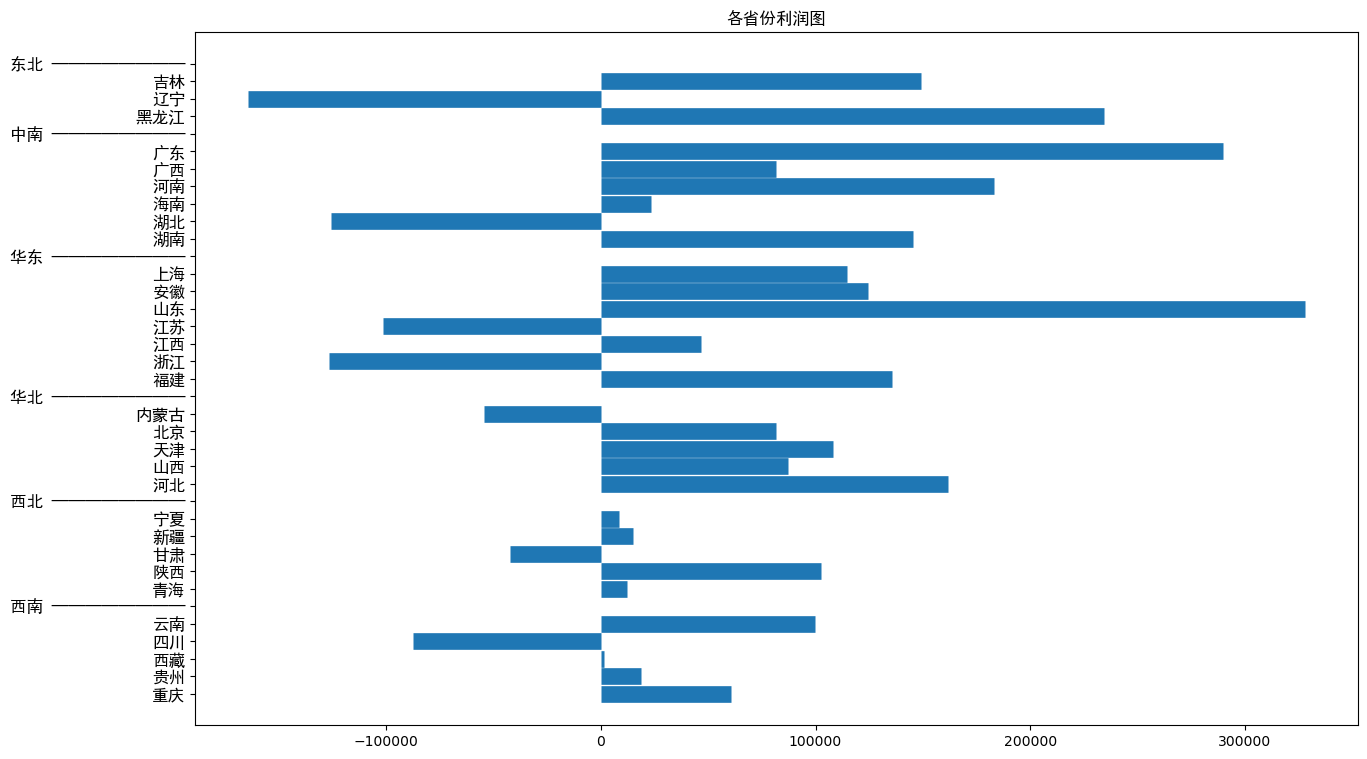

In [109]:
plt.figure(figsize=(15, 9))
plt.hlines(y=provinces,xmin = 0,xmax = profits,linewidth = 12)
plt.yticks(fontproperties=font)
plt.title("各省份利润图",fontproperties=font)
plt.show ()

### 订单量-利润分布图

In [112]:
df2 = df[['利润','订单年份', '省/自治区']].drop_duplicates().groupby(['订单年份', '省/自治区']).sum().reset_index()
missing_rows = pd.DataFrame([('青海','2013',0),('青海','2014',0),('西藏','2015',0)], columns=['省/自治区', '订单年份','利润'])
df2 = pd.concat([df2, missing_rows]).astype({'订单年份': int})
print(df2)

df3 = df[['订单编号','订单年份', '省/自治区']].drop_duplicates().groupby(['订单年份', '省/自治区']).count().reset_index()
missing_rows = pd.DataFrame([('青海','2013',0),('青海','2014',0),('西藏','2015',0)], columns=['省/自治区', '订单年份','订单编号'])
df3 = pd.concat([df3, missing_rows]).astype({'订单年份': int})
print(df3)

     订单年份 省/自治区     利润
0    2013    上海  17702
1    2013    云南  16934
2    2013   内蒙古 -14921
3    2013    北京  19837
4    2013    吉林  17692
..    ...   ...    ...
119  2016    青海   2968
120  2016   黑龙江  83471
0    2013    青海      0
1    2014    青海      0
2    2015    西藏      0

[124 rows x 3 columns]
     订单年份 省/自治区  订单编号
0    2013    上海    25
1    2013    云南     8
2    2013   内蒙古    21
3    2013    北京    17
4    2013    吉林    29
..    ...   ...   ...
119  2016    青海     5
120  2016   黑龙江   111
0    2013    青海     0
1    2014    青海     0
2    2015    西藏     0

[124 rows x 3 columns]


In [116]:
provinces = df2['省/自治区'].drop_duplicates().tolist()
years = [2013,2014,2015,2016]

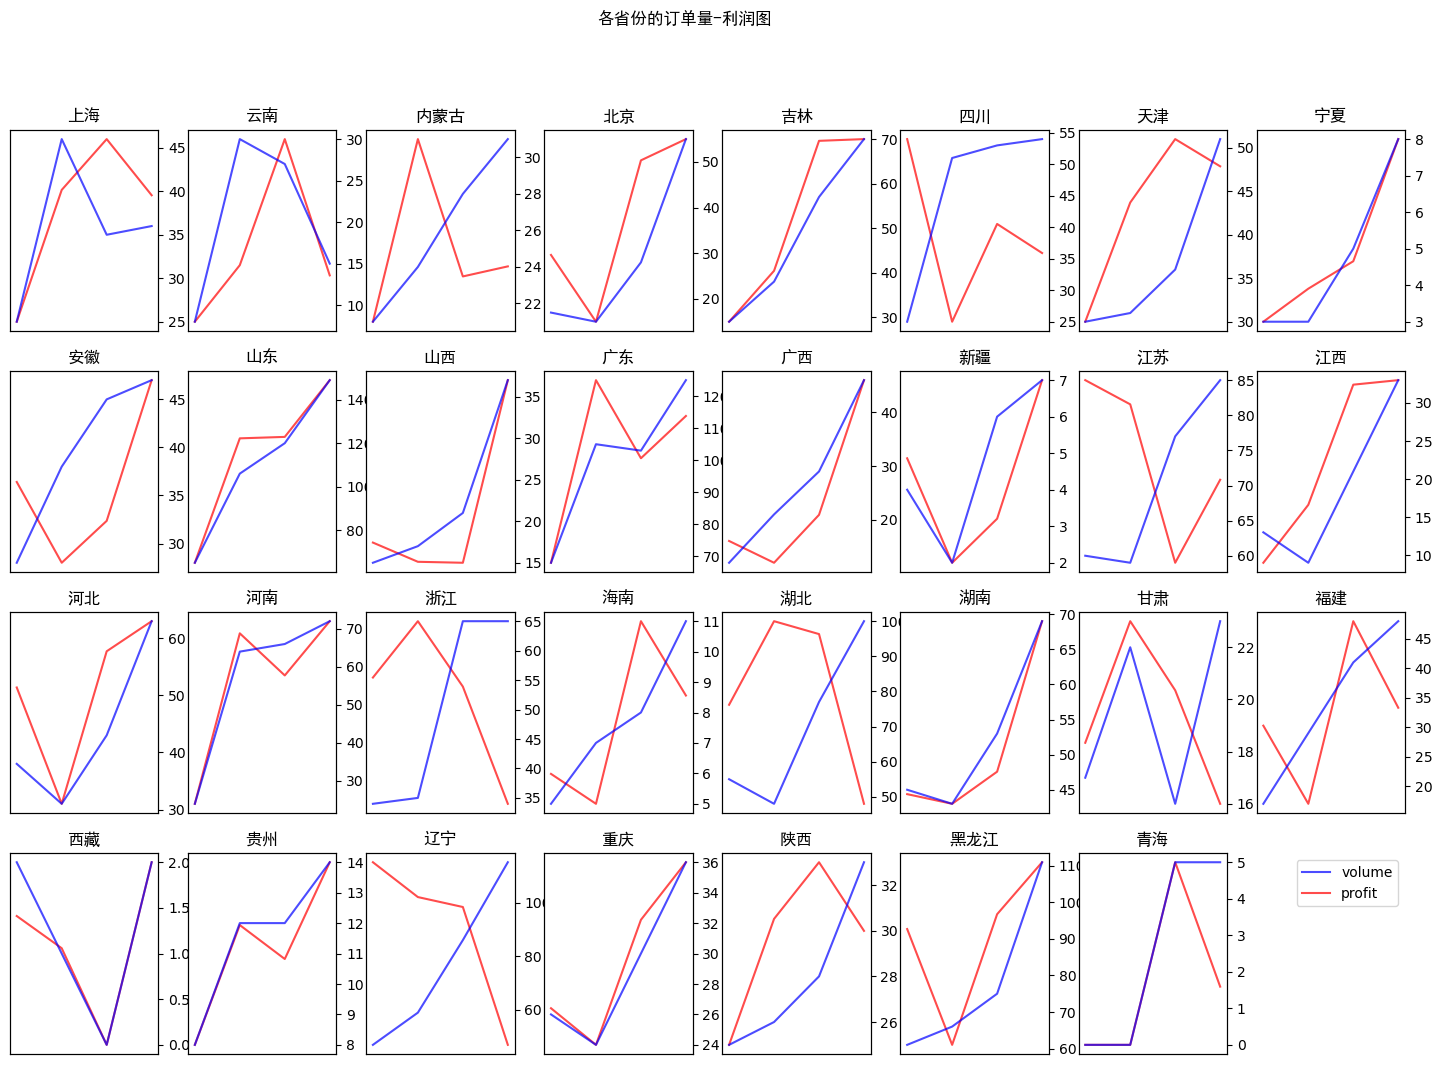

In [133]:
plt.figure(figsize=(18, 12))
plt.suptitle("各省份的订单量-利润图", fontproperties=font)
for i in range(len(provinces)):
    province = provinces[i]
    profit = [0,0,0,0]
    count = [0,0,0,0]
    for j in range(len(years)):
        count[j] = df3[(df3['省/自治区']==province)&(df3['订单年份']==years[j])]['订单编号'].values[0]
        profit[j] = df2[(df2['省/自治区']==province)&(df2['订单年份']==years[j])]['利润'].values[0]
    plt.subplot(4,8,i+1)
    plt.yticks([])
    plt.xticks([])
    plt.plot(years, profit,color = 'red', alpha = 0.7,label='利润')
    plt.twinx().plot(years,count, color='blue', alpha=0.7, label="订单量")
    plt.title(province, fontproperties=font)
    
plt.subplot(4, 8, 32)
plt.plot (0, 0, color = 'blue', alpha = 0.7, label = 'volume')
plt.plot (0, 0,color = 'red',alpha = 0.7, label = 'profit')
plt.legend()
plt.axis('off')
plt.show()

In [ ]:

plt.suptitle("个子类别商品总销量随时间的变化趋势图", fontproperties=font)
for i in range(len(categories)):
    plt.subplot(3,6,i+1)
    plt.plot(years, values[i],color = 'blue', alpha = 0.7,label='总销量')
    plt.title(categories[i], fontproperties=font)
    plt.yticks([])
    plt.xticks([])
    i += 1
plt.subplot(3,6,18)
plt.plot(0, 0,color = 'blue', alpha = 0.7, label = '总销量')
plt.legend(prop=font)
plt.axis('off')
plt.show()